## **Một số thuật toán cơ bản của học máy**

### Linear Regerssion

**- Biết: Hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên 1 or nhiều biến độc lập**

## Sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu boston housting

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns = cali.feature_names)
y = pd.Series(cali.target)

In [4]:
# chia tập dữ liệu có 80% huấn luyện và 20% kiếm tra

In [5]:
# Chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Xây dựng và huấn luyện mô hình 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
#Dự đoán và đánh giá
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(mse, r2)


0.555891598695244 0.5757877060324511


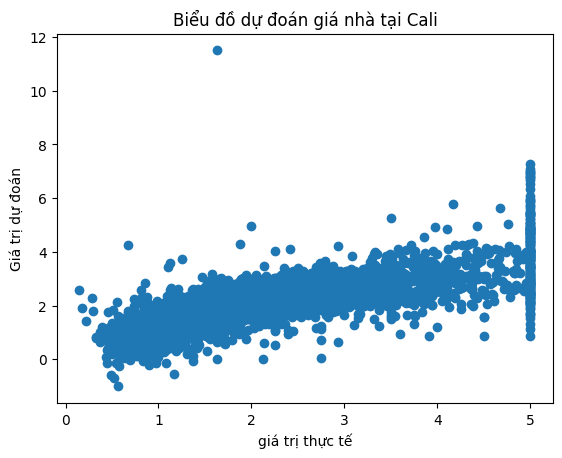

In [11]:
#Trực quan hóa dữ liệu và vẽ biểu đồ

plt.scatter(y_test, y_pred)
plt.xlabel("giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ dự đoán giá nhà tại Cali")
plt.show()

### Bài tập 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Đọc dữ liệu từ file lab1data1.txt
data = pd.read_csv('lab1data1.txt', header=None)

data


,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [53]:

X = data[:, 0].reshape(-1, 1)  
y = data[:, 1]                 

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




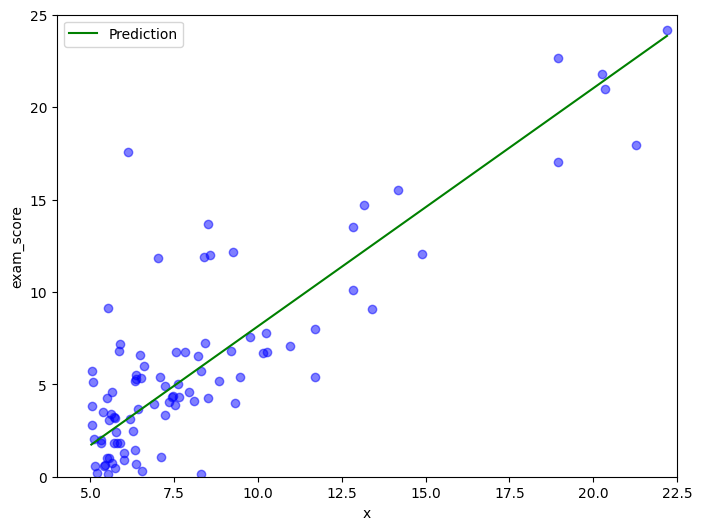

Mean squared error: 15.71
R² score: 0.50


In [55]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Tạo đường dự đoán
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)  # Vẽ tất cả các điểm dữ liệu
plt.plot(X_line, y_line, color='green', label='Prediction')

# Tùy chỉnh đồ thị
plt.xlabel('x')
plt.ylabel('exam_score')
plt.legend()

# Thiết lập giới hạn trục
plt.xlim(4, 22.5)
plt.ylim(0, 25)

plt.show()

# Tính và in các chỉ số đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
print(f'R² score: {r2:.2f}')

## Hồi quy Logistic
**Phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng**

In [1]:
# Xây dựng mô hình Logistic để phân loại nhị phân trong dữ liệu breast cancer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
#load data

data = load_breast_cancer()
x = data.data
y = data.target


In [3]:
#Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=42)

In [4]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [5]:
# Dự đoán và đánh giá
y_pred = model.predict(x_test)

# Tính MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}, R^2: {r2:.6f}")

MSE: 0.035129, R^2: 0.846770


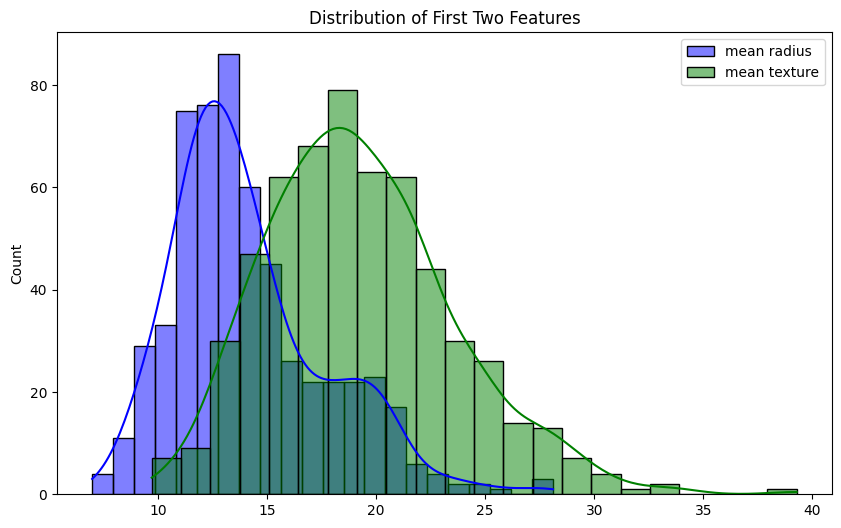

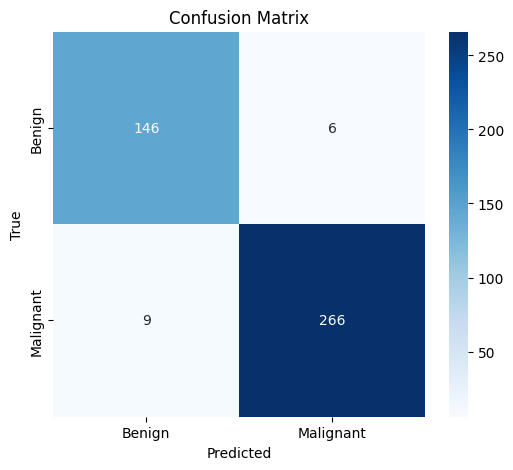

In [11]:
# Trực quan hóa 
plt.figure(figsize=(10, 6))
sns.histplot(x[:, 0], kde=True, color='blue', label=data.feature_names[0])
sns.histplot(x[:, 1], kde=True, color='green', label=data.feature_names[1])
plt.title('Distribution of First Two Features')
plt.legend()
plt.show()

# Trực quan hóa ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
#Phân cụm
# Nhóm các tối tượng có đặt điểm tương đồng và không cần gán nhãn

In [18]:
#Sử dụng data Iris để phân cụm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [13]:
# Sử dụng dữ liệu Iris để phân cụm
iris = datasets.load_iris()
x = iris.data  # có 4 đặc trưng
y = iris.target # nhãn để so sánh

In [19]:
# Áp dụng KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [20]:
# Sử dụng PCA để giảm chiều (giảm xuống 2 chiều)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

Text(0, 0.5, 'PCA 2')

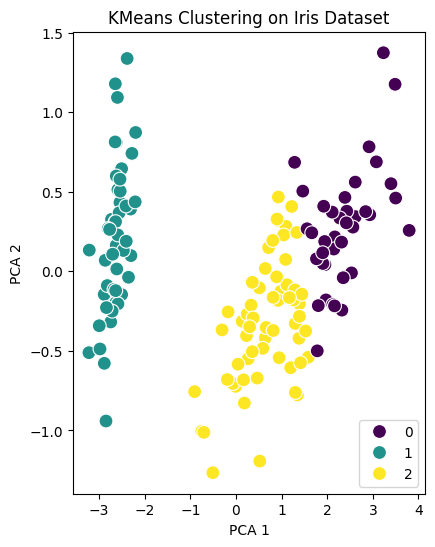

In [23]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))

# Biểu đồ phân cụm
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=100)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


In [82]:
#Bài tập về nhà

In [83]:
# 1. Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic

In [43]:
# Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc




In [44]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('framingham.csv')

In [45]:
# Xử lý dữ liệu thiếu: Điền giá trị thiếu bằng giá trị trung bình của cột
data_filled = data.fillna(data.mean())

In [46]:
# Tách dữ liệu thành các đặc trưng và nhãn mục tiêu
X = data_filled.drop(columns=['TenYearCHD'])
y = data_filled['TenYearCHD']

In [47]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Chuẩn hóa dữ liệu (tiêu chuẩn hóa các giá trị đặc trưng)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Xây dựng mô hình hồi quy logistic
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

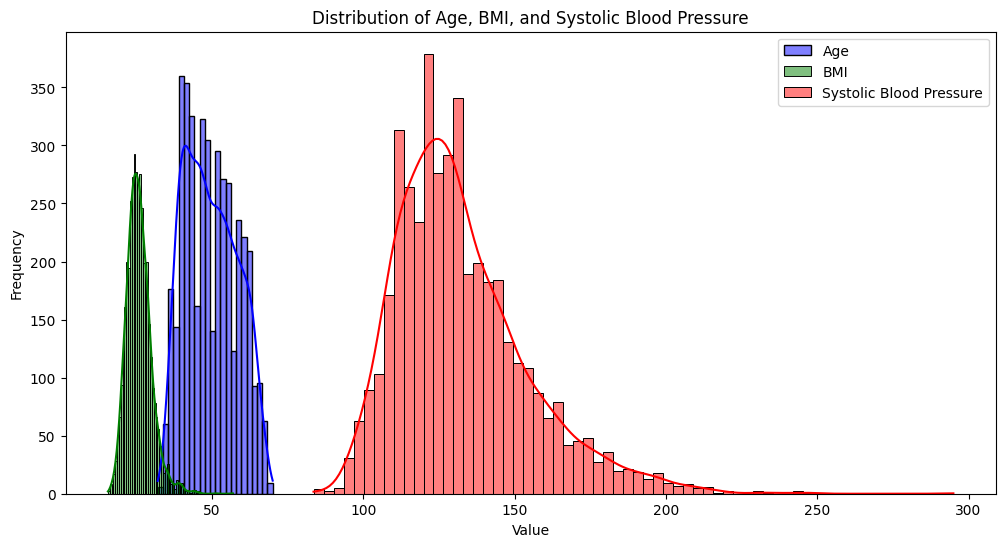

In [50]:
# 1. Trực quan hóa phân phối các đặc trưng (ví dụ: tuổi, BMI, huyết áp)
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, color='blue', label='Age')
sns.histplot(data['BMI'], kde=True, color='green', label='BMI')
sns.histplot(data['sysBP'], kde=True, color='red', label='Systolic Blood Pressure')
plt.legend()
plt.title('Distribution of Age, BMI, and Systolic Blood Pressure')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

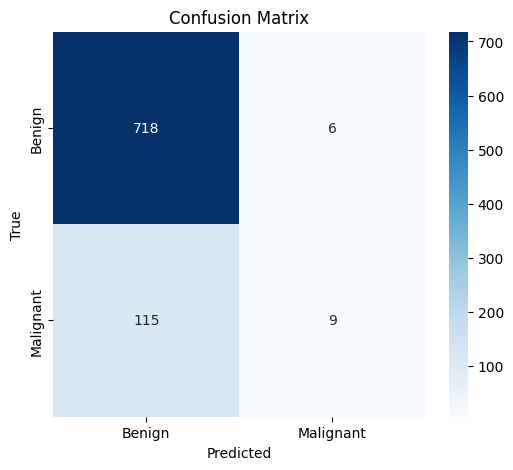

In [51]:
# 2. Trực quan hóa Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [88]:
# 2: Ứng dụng thuật toán Kmean cho tập dữ liệu customer data, you can get in Kanggle

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Mall_Customers.csv')

In [55]:
# Xem thông tin dữ liệu
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [56]:
# Loại bỏ cột CustomerID và chuyển Genre thành dạng số
data_cleaned = data.drop(columns=['CustomerID'])
data_cleaned['Genre'] = data_cleaned['Genre'].map({'Male': 0, 'Female': 1})

In [57]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [58]:
# Áp dụng KMeans với số cụm K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)


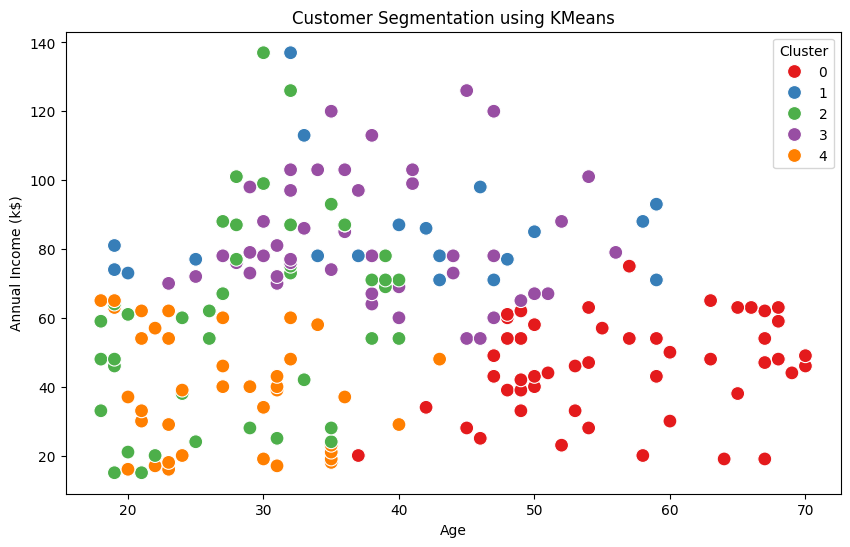

In [59]:
# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['Annual_Income_(k$)'], hue=data_cleaned['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation using KMeans')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [61]:
# 3: tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn (khuyến nhị: Pressicion recal, currentcy, F1,......)

In [14]:
# Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc


# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])[0:2])

# In kết quả
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)
print("ROC AUC:", roc_auc)


Accuracy: 0.8573113207547169
Confusion Matrix:
 [[718   6]
 [115   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

ROC AUC: 0.707794956335769


In [17]:
# Import thư viện
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Chuyển Spending_Score thành nhãn mục tiêu nhị phân: Nếu Spending_Score > 50 thì là 1 (chi tiêu cao), ngược lại là 0
data_mall['High_Spender'] = data_mall['Spending_Score'].apply(lambda x: 1 if x > 50 else 0)

# Mã hóa cột 'Genre' từ giá trị phân loại thành số (1 cho Male, 0 cho Female)
label_encoder = LabelEncoder()
data_mall['Genre'] = label_encoder.fit_transform(data_mall['Genre'])

# Tách dữ liệu thành các đặc trưng và nhãn mục tiêu
X_mall = data_mall.drop(columns=['CustomerID', 'Spending_Score', 'High_Spender'])
y_mall = data_mall['High_Spender']

# Dự đoán trên tập kiểm tra
y_pred_mall = model_mall.predict(X_test_scaled_mall)

# Đánh giá mô hình
accuracy_mall = accuracy_score(y_test_mall, y_pred_mall)
cm_mall = confusion_matrix(y_test_mall, y_pred_mall)
report_mall = classification_report(y_test_mall, y_pred_mall)
roc_auc_mall = roc_auc_score(y_test_mall, model_mall.predict_proba(X_test_scaled_mall)[:,1])

# In kết quả
print("Accuracy:", accuracy_mall)
print("Confusion Matrix:\n", cm_mall)
print("Classification Report:\n", report_mall)
print("ROC AUC:", roc_auc_mall)


Accuracy: 0.725
Confusion Matrix:
 [[15  8]
 [ 3 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.64      0.82      0.72        17

    accuracy                           0.72        40
   macro avg       0.73      0.74      0.72        40
weighted avg       0.75      0.72      0.73        40

ROC AUC: 0.7902813299232736


In [87]:
#Deadline 23h59p59s ngày 28/02/2025 